**Stock Market Analysis Steps:**

1. Data Loading and Initial Exploration
2. Data Cleaning and Preprocessing
3. EDA (Exploratory Data Analysis)
4. Moving Averages
5. Data Visualisation
6. Error Handling



**1. Data Loading and Initial Exploration**

In [1]:
# Data Loading and Initial Exploration:

# Mounting Google Drive:

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
abbot_df = pd.read_csv('/content/drive/MyDrive/Project_Stock_Analysis/ABBOTINDIA.NS.csv')

nsei_df = pd.read_csv('/content/drive/MyDrive/Project_Stock_Analysis/^NSEI.csv')



In [4]:
# Checking Abbot dataset:

abbot_df.shape

(1235, 7)

In [5]:
abbot_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,8424.000000,8820.049805,8418.349609,8593.349609,8139.855469,24752.0
1,2018-09-11,8670.000000,8729.099609,8370.000000,8428.299805,7983.516602,9988.0
2,2018-09-12,8360.000000,8500.000000,8163.049805,8449.450195,8003.549805,12706.0
3,2018-09-14,8502.000000,8509.900391,8352.000000,8388.099609,7945.437988,8500.0
4,2018-09-17,8280.150391,8483.950195,8280.150391,8441.750000,7996.256836,4526.0


In [6]:
abbot_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,8424.000000,8820.049805,8418.349609,8593.349609,8139.855469,24752.0
1,2018-09-11,8670.000000,8729.099609,8370.000000,8428.299805,7983.516602,9988.0
2,2018-09-12,8360.000000,8500.000000,8163.049805,8449.450195,8003.549805,12706.0
3,2018-09-14,8502.000000,8509.900391,8352.000000,8388.099609,7945.437988,8500.0
4,2018-09-17,8280.150391,8483.950195,8280.150391,8441.750000,7996.256836,4526.0


In [7]:
# Checking NSEI dataset:

nsei_df.shape


(1235, 7)

In [8]:
nsei_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,11570.250000,11573.000000,11427.299805,11438.099609,11438.099609,286700.0
1,2018-09-11,11476.849609,11479.400391,11274.000000,11287.500000,11287.500000,0.0
2,2018-09-12,11340.099609,11380.750000,11250.200195,11369.900391,11369.900391,268200.0
3,2018-09-14,11443.500000,11523.250000,11430.549805,11515.200195,11515.200195,276600.0
4,2018-09-17,11464.950195,11464.950195,11366.900391,11377.750000,11377.750000,201400.0


In [9]:
# Check for Missing Values:

# Abbot India:
abbot_df.isnull().sum()

# Nifty50:
nsei_df.isnull().sum()


Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [10]:
# Drop row with missing values:

nsei_df.dropna(inplace=True)


# check again for missing values in Nifty50:
nsei_df.isnull().sum()



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**2. Data Cleaning and Preprocessing**

In [11]:
# Convert the 'Date' Column to datetime format:


abbot_df['Date'] = pd.to_datetime(abbot_df['Date'])
nsei_df['Date'] = pd.to_datetime(nsei_df['Date'])

# Set it as index:

abbot_df.set_index('Date', inplace=True)
nsei_df.set_index('Date', inplace=True)

In [12]:
abbot_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,8424.000000,8820.049805,8418.349609,8593.349609,8139.855469,24752.0
2018-09-11,8670.000000,8729.099609,8370.000000,8428.299805,7983.516602,9988.0
2018-09-12,8360.000000,8500.000000,8163.049805,8449.450195,8003.549805,12706.0
2018-09-14,8502.000000,8509.900391,8352.000000,8388.099609,7945.437988,8500.0
2018-09-17,8280.150391,8483.950195,8280.150391,8441.750000,7996.256836,4526.0


In [13]:
nsei_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,11570.250000,11573.000000,11427.299805,11438.099609,11438.099609,286700.0
2018-09-11,11476.849609,11479.400391,11274.000000,11287.500000,11287.500000,0.0
2018-09-12,11340.099609,11380.750000,11250.200195,11369.900391,11369.900391,268200.0
2018-09-14,11443.500000,11523.250000,11430.549805,11515.200195,11515.200195,276600.0
2018-09-17,11464.950195,11464.950195,11366.900391,11377.750000,11377.750000,201400.0


**3. EDA (Exploratory Data Analysis)**

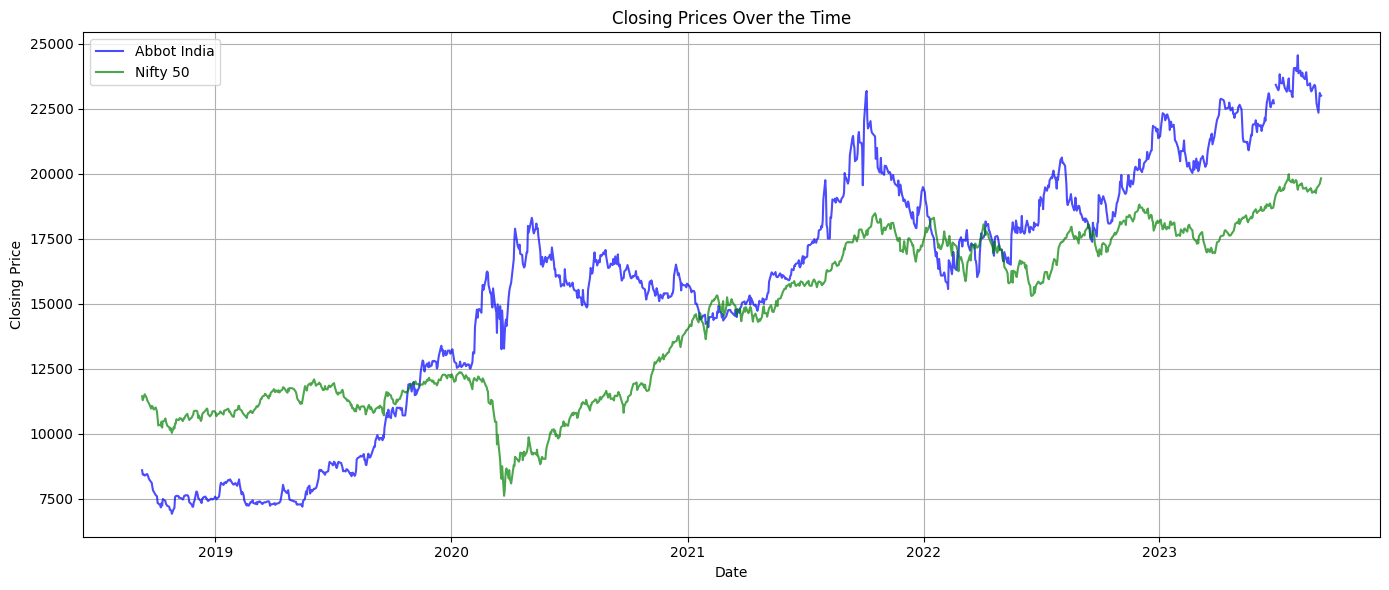

In [14]:
# Plot the Closing Price over the time:

# Plot Size:

plt.figure(figsize=(14,6))

# Abbot India:
plt.plot(abbot_df['Close'], label='Abbot India', color='blue', alpha=0.7)


# Nifty 50
plt.plot(nsei_df['Close'], label='Nifty 50', color='green', alpha=0.7)

plt.title('Closing Prices Over the Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


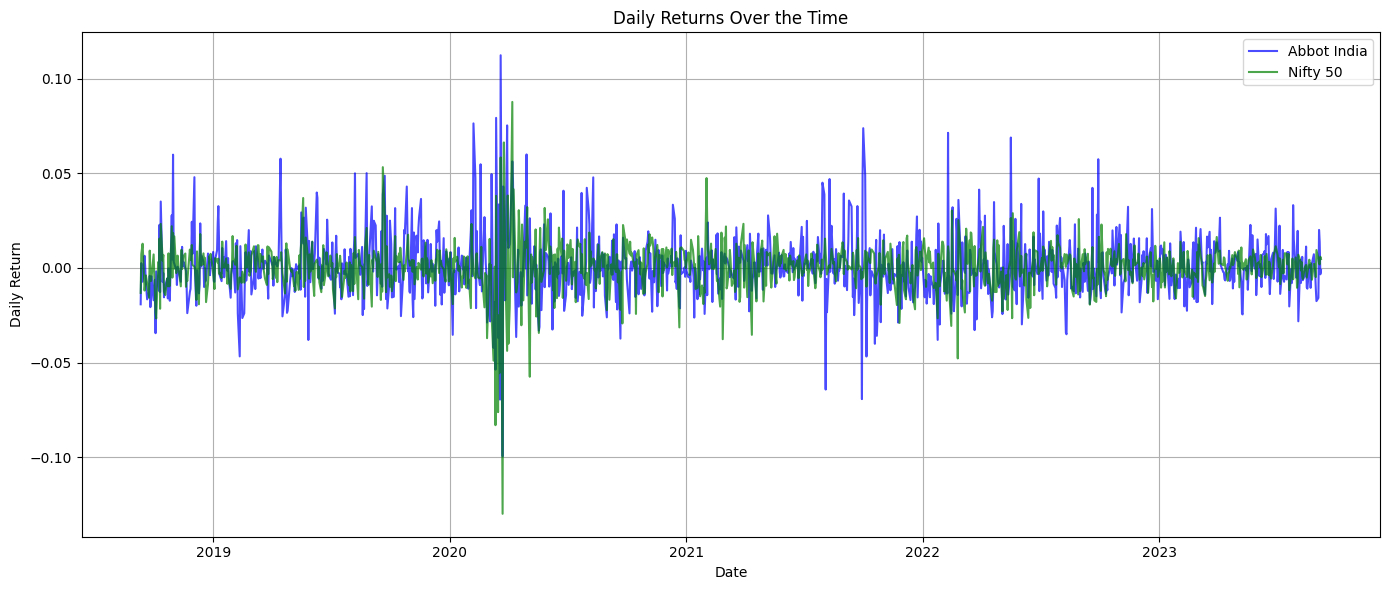

In [15]:
# Calculate Daily Return:

# ((Today's Closing Price - Yesterday's Closing Price)/ Yesterday's Closing Price) * 100

abbot_df['Daily Return'] = abbot_df['Close'].pct_change()

nsei_df['Daily Return'] = nsei_df['Close'].pct_change()

# Plot Size:

plt.figure(figsize=(14,6))



# Abbot India:
plt.plot(abbot_df['Daily Return'], label='Abbot India', color='blue', alpha=0.7)


# Nifty 50
plt.plot(nsei_df['Daily Return'], label='Nifty 50', color='green', alpha=0.7)


plt.title('Daily Returns Over the Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




**4. Moving Averages**


1.   Calculate and plot short term (50 days) and long term (200 days) moving Average

2.   Trading Strategy:

      *   Buy when short term moving average crosses above long term moving average
      *   Sell when short term moving average crosses below long term moving average




In [38]:
# Calculate and short term (50 days) and long term (200 days) moving Average

short_window = 50
long_window = 200


abbot_df['50 day MA'] = abbot_df['Close'].rolling(window=short_window).mean()

abbot_df['200 day MA'] = abbot_df['Close'].rolling(window=long_window).mean()



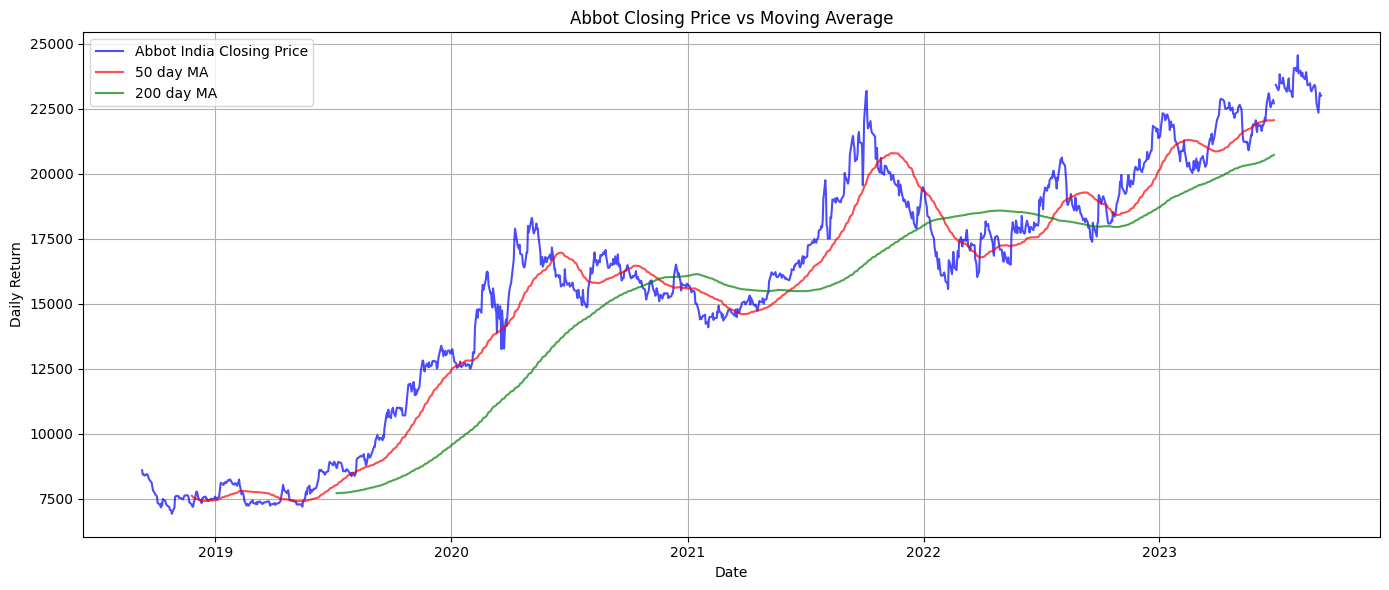

In [39]:
# Plot:


# Plot Size:

plt.figure(figsize=(14,6))


# Abbot India:
plt.plot(abbot_df['Close'], label='Abbot India Closing Price', color='blue', alpha=0.7)

# 50 Days Moving Average:
plt.plot(abbot_df['50 day MA'], label='50 day MA', color='red', alpha=0.7)

# 200 Days Moving Average:
plt.plot(abbot_df['200 day MA'], label='200 day MA', color='green', alpha=0.7)


plt.title('Abbot Closing Price vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Daily Return')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
# Create signals

abbot_df['Signal'] = 0.0  # Initialize with zeros
abbot_df['Signal'][short_window:] = np.where(abbot_df['50 Day MA'][short_window:]
                                            > abbot_df['200 Day MA'][short_window:], 1.0, 0.0)



In [40]:
# Calculate positions
abbot_df['Position'] = abbot_df['Signal'].diff()



Date
2018-09-10    NaN
2018-09-11    0.0
2018-09-12    0.0
2018-09-14    0.0
2018-09-17    0.0
             ... 
2023-09-04    0.0
2023-09-05    0.0
2023-09-06    0.0
2023-09-07    0.0
2023-09-08    0.0
Name: Position, Length: 1235, dtype: float64

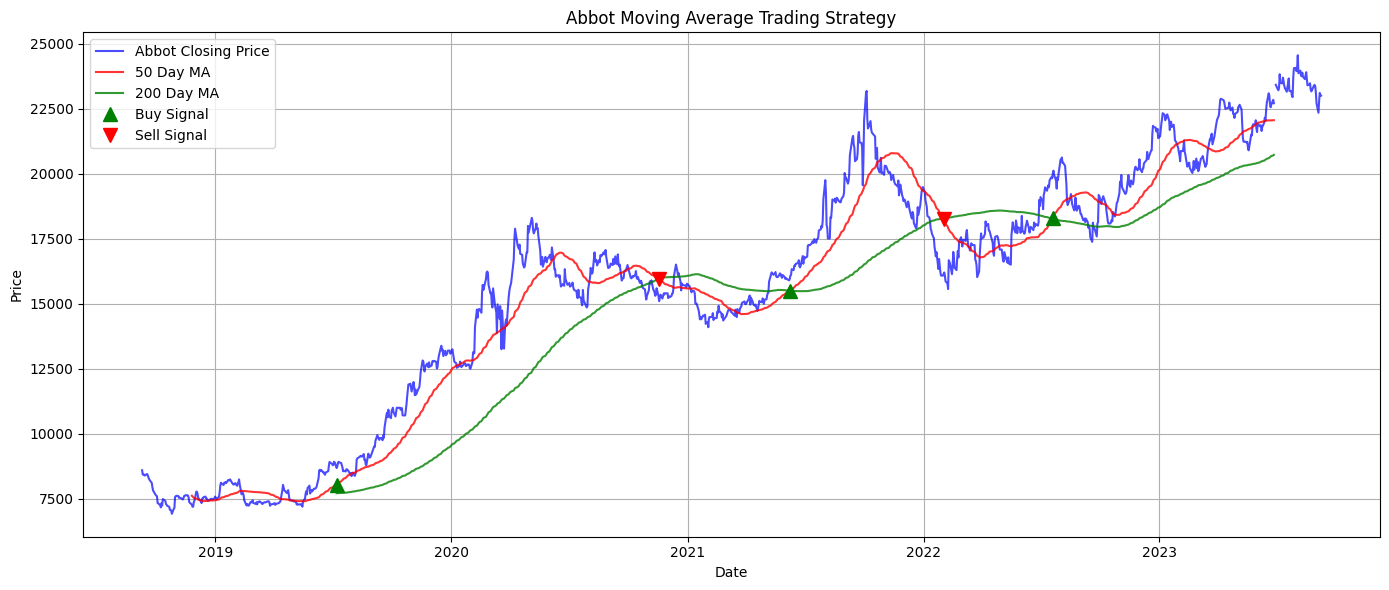

In [37]:

# Plotting
plt.figure(figsize=(14, 6))

# Abbot closing prices
plt.plot(abbot_df['Close'], label='Abbot Closing Price', color='blue', alpha=0.7)

# 50-day moving average
plt.plot(abbot_df['50 Day MA'], label='50 Day MA', color='red', alpha=0.8)

# 200-day moving average
plt.plot(abbot_df['200 Day MA'], label='200 Day MA', color='green', alpha=0.8)

# Buy signals
plt.plot(abbot_df[abbot_df['Position'] == 1.0].index,
         abbot_df['50 Day MA'][abbot_df['Position'] == 1.0],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Sell signals
plt.plot(abbot_df[abbot_df['Position'] == -1.0].index,
         abbot_df['50 Day MA'][abbot_df['Position'] == -1.0],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Abbot Moving Average Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

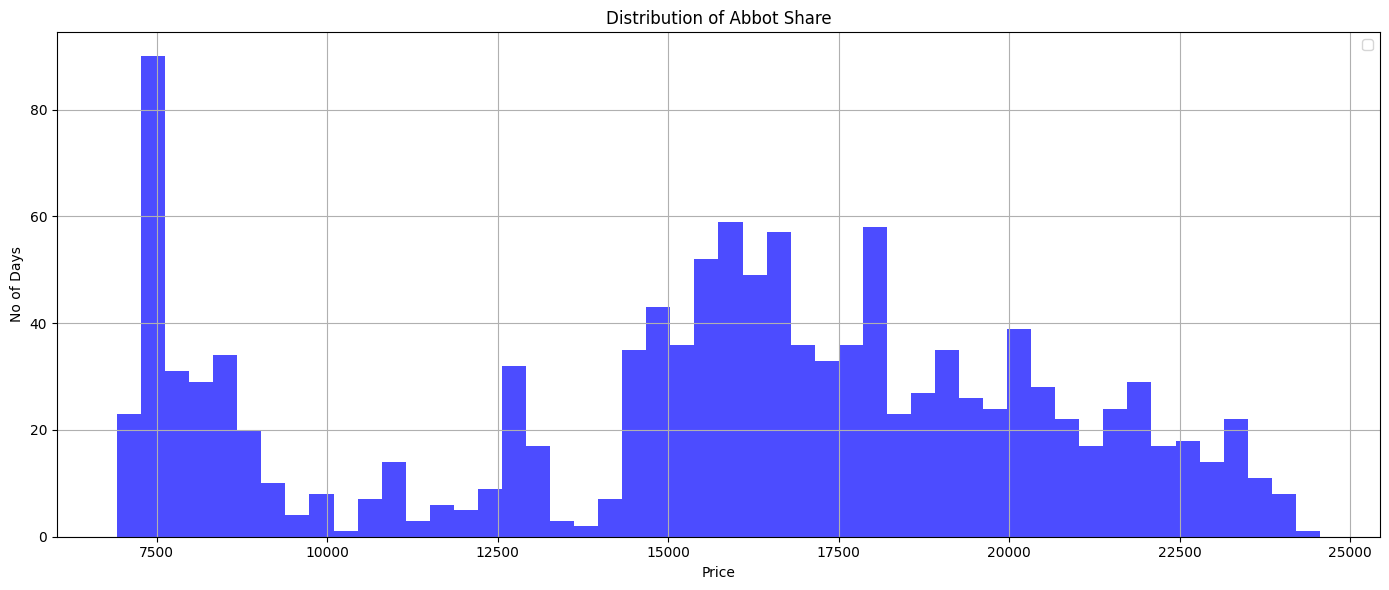

In [42]:
# Data Visualisation


# Histogram for Abbot share prices distribution:

plt.figure(figsize=(14,6))


# Abbot India:
plt.hist(abbot_df['Close'], bins = 50, color='blue', alpha=0.7)

plt.title('Distribution of Abbot Share')
plt.xlabel('Price')
plt.ylabel('No of Days')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





In [47]:
# Correlation with Market:

# nsei_df

# Merging two Df:

merged_df  = pd.merge(abbot_df[['Daily Return']], nsei_df[['Daily Return']], left_index=True, right_index=True, how='inner')

merged_df.columns = ['Abbot Daily Return', 'Nifty 50 Daily Return']


correlation = merged_df['Abbot Daily Return'].corr(merged_df['Nifty 50 Daily Return'])
correlation






0.321111199513336